# **딥 러닝 기반 다중 클래스 분류 모델**

## NVIDIA-GPU 세팅 확인

In [ ]:
!nvidia-smi

Mon Jul  7 07:25:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **데이터셋 불러오기**

In [ ]:
# 사용할 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drug200.csv")

### 데이터셋 살펴보기

In [ ]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
df.shape

(200, 6)

## **입력 및 목표 (Target) 데이터 분리**

In [ ]:
input_data, target_data = df.drop(columns=["Drug"], axis=1), df["Drug"]

### 입력 변수 명칭 확인

In [ ]:
input_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

### 입력 변수 데이터 타입 확인

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


### 목표 (Target) 변수 확인

In [ ]:
target_data

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


## **데이터셋 전처리**

### One-Hot Encoding

In [ ]:
target_data_ohe = input_data.loc[:, ["Sex","BP","Cholesterol"]]

In [ ]:
target_data_ohe

,Sex,BP,Cholesterol
0,F,HIGH,HIGH
1,M,LOW,HIGH
2,M,LOW,HIGH
3,F,NORMAL,HIGH
4,F,LOW,HIGH
...,...,...,...
195,F,LOW,HIGH
196,M,LOW,HIGH
197,M,NORMAL,HIGH
198,M,NORMAL,NORMAL


In [ ]:
target_data_ohe = pd.get_dummies(target_data_ohe)

In [ ]:
target_data_ohe

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,True,False,True,False,False,True,False
1,False,True,False,True,False,True,False
2,False,True,False,True,False,True,False
3,True,False,False,False,True,True,False
4,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...
195,True,False,False,True,False,True,False
196,False,True,False,True,False,True,False
197,False,True,False,False,True,True,False
198,False,True,False,False,True,False,True


### Min-Max Normalization

In [ ]:
def MinMaxNorm(df) :
  return (df-df.min())/(df.max()-df.min())

In [ ]:
target_data_mmn = MinMaxNorm(input_data.drop(["Sex","BP","Cholesterol"], axis=1))

In [ ]:
target_data_mmn

,Age,Na_to_K
0,0.135593,0.596848
1,0.542373,0.213397
2,0.542373,0.120239
3,0.220339,0.047814
4,0.779661,0.368191
...,...,...
195,0.694915,0.165676
196,0.016949,0.179405
197,0.627119,0.113359
198,0.135593,0.242385


### 전처리가 적용된 데이터셋 합치기

In [ ]:
input_data = pd.concat([target_data_ohe, target_data_mmn], axis=1)

In [ ]:
input_data

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Na_to_K
0,True,False,True,False,False,True,False,0.135593,0.596848
1,False,True,False,True,False,True,False,0.542373,0.213397
2,False,True,False,True,False,True,False,0.542373,0.120239
3,True,False,False,False,True,True,False,0.220339,0.047814
4,True,False,False,True,False,True,False,0.779661,0.368191
...,...,...,...,...,...,...,...,...,...
195,True,False,False,True,False,True,False,0.694915,0.165676
196,False,True,False,True,False,True,False,0.016949,0.179405
197,False,True,False,False,True,True,False,0.627119,0.113359
198,False,True,False,False,True,False,True,0.135593,0.242385


### Label-Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
target_data

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [ ]:
label_enc = LabelEncoder()
label_enc.fit(target_data)
target_data = label_enc.transform(target_data)

[]

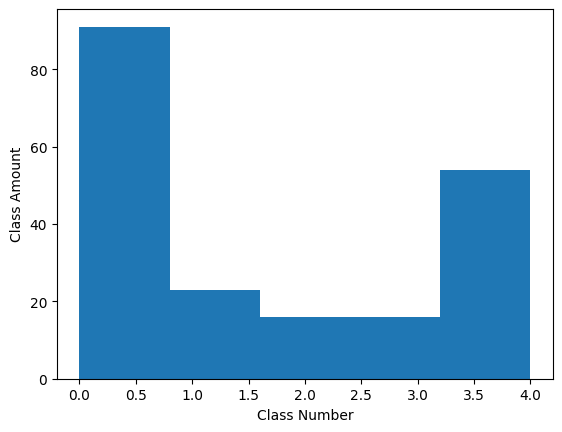

In [ ]:
plt.hist(target_data, bins=5)
plt.xlabel("Class Number")
plt.ylabel("Class Amount")
plt.plot()

### 훈련 및 시험 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
input_data, target_data = np.array(input_data, dtype=np.float64), np.array(target_data) # Boolean → Numerical Value (0 or 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.1, random_state=42)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(162, 9) (162,)
(18, 9) (18,)
(20, 9) (20,)


In [ ]:
x_train

array([[1.        , 0.        , 1.        , ..., 0.        , 0.76271186,
        0.21996373],
       [0.        , 1.        , 1.        , ..., 0.        , 0.27118644,
        0.75354932],
       [1.        , 0.        , 0.        , ..., 1.        , 0.59322034,
        0.18844205],
       ...,
       [0.        , 1.        , 1.        , ..., 1.        , 0.57627119,
        0.07602101],
       [0.        , 1.        , 0.        , ..., 1.        , 0.13559322,
        0.24238539],
       [0.        , 1.        , 0.        , ..., 0.        , 0.57627119,
        0.13346676]])

In [ ]:
y_train

array([2, 0, 4, 0, 0, 4, 4, 0, 3, 0, 3, 0, 4, 4, 0, 3, 2, 4, 4, 2, 1, 0,
       3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 0, 1, 0, 2, 0, 0, 0, 0,
       3, 4, 1, 2, 4, 0, 0, 0, 3, 3, 0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 2, 4,
       0, 1, 4, 0, 0, 1, 1, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 1, 4, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 4, 2, 0, 0, 0,
       4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 1, 1, 3, 0, 0, 4, 1, 1, 1,
       4, 0, 1, 0, 4, 4, 4, 0, 1, 0, 4, 0, 4, 4, 4, 1, 0, 1, 0, 4, 0, 0,
       0, 3, 4, 0, 0, 1, 4, 3])

## **PyTorch DataLoader Class 생성**

In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
class MyDataLoader(Dataset) :
  def __init__(self, input_data:np.array, target_data:np.array) :
    # Inheritance
    super(MyDataLoader, self).__init__()

    # Initialize Variable
    self.input_data = input_data
    self.target_data = target_data

  def __getitem__(self, index) :
    input = self.input_data[index, :]
    target = self.target_data[index]

    input = torch.as_tensor(input)
    target = torch.tensor(target).type(torch.LongTensor)

    return {"input":input.float(), "target":target}

  def __len__(self) :
    return len(self.input_data)

## **PyTorch 분류 모델 생성**

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
class MyModel(nn.Module) :
  def __init__(self, input_dim:int, target_dim:int, hidden_dim:int) :
    # Inheritance
    super(MyModel, self).__init__()

    # Create MLP Layer Instance
    self.layer0 = nn.Linear(input_dim, hidden_dim)
    self.layer1 = nn.Linear(hidden_dim, hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, target_dim)

  def forward(self, input) :
    output = F.relu(self.layer0(input))
    output = F.relu(self.layer1(output))
    output = self.layer2(output)

    return output

## **훈련 하이퍼파라미터 생성**

In [ ]:
opt = {"seed":42,
       "num_class":5,
       "batch_size":8,
       "lr":1e-3,
       "epochs":50,
       "cuda":torch.cuda.is_available()}

## **딥 러닝 모델 훈련**

In [ ]:
# 사용할 라이브러리 불러오기
from torch.utils.data import DataLoader
from torch import optim

from torchsummary import summary

from tqdm import tqdm

### Seed 고정

In [ ]:
import random

In [ ]:
def fix_seed(seed) :
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

### **훈련 과정 요약을 위한 Average Meter 인스턴스 생성**

In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val*n
        self.count += n
        self.avg = self.sum / self.count

### **정확도 계산을 위한 Function 생성**

In [ ]:
def compute_acc(pred, target) :
  acc = (torch.argmax(pred, dim=1)==target).sum()/pred.size(0)

  return acc

## **추상화된 딥 러닝 모델 훈련 코드 작성**

In [ ]:
def train(opt, dataset, criterion) :
  fix_seed(opt["seed"])

  train_dataloader = DataLoader(MyDataLoader(dataset["x_train"], dataset["y_train"]), batch_size=opt["batch_size"], shuffle=True, drop_last=True)
  valid_dataloader = DataLoader(MyDataLoader(dataset["x_valid"], dataset["y_valid"]), batch_size=opt["batch_size"], shuffle=False, drop_last=False)

  fix_seed(opt["seed"])
  model = MyModel(x_train.shape[1], opt["num_class"], 64)
  if opt["cuda"] :
    model = model.cuda()

  summary(model, (1, dataset["x_train"].shape[1]))

  optimizer = optim.Adam(model.parameters(), lr=opt["lr"])

  train_loss, valid_loss = AverageMeter(), AverageMeter()
  train_acc, valid_acc = AverageMeter(), AverageMeter()
  train_loss_list, valid_loss_list = [], []
  train_acc_list, valid_acc_list = [], []
  best_acc = 0

  for epoch in range(1, opt["epochs"]+1) :
    train_bar = tqdm(train_dataloader)
    train_loss.reset(), train_acc.reset()

    for data in train_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      optimizer.zero_grad()
      pred = model(input)
      loss = criterion(pred, target)
      loss.backward()
      optimizer.step()

      train_loss.update(loss.item(), opt["batch_size"])
      train_acc.update(compute_acc(pred, target).item(), opt["batch_size"])
      train_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Train] < Accuracy:{train_acc.avg:.6f} | Loss:{train_loss.avg:.6f} >")

    train_loss_list.append(train_loss.avg)
    train_acc_list.append(train_acc.avg)

    valid_bar = tqdm(valid_dataloader)
    valid_loss.reset(), valid_acc.reset()

    for data in valid_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      model.eval()
      with torch.no_grad() :
        pred = model(input)
        loss = criterion(pred, target)

        valid_loss.update(loss.item(), opt["batch_size"])
        valid_acc.update(compute_acc(pred, target).item(), opt["batch_size"])
        valid_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Valid] < Accuracy:{valid_acc.avg:.6f} | Loss:{train_loss.avg:.6f} >")

    valid_loss_list.append(valid_loss.avg)
    valid_acc_list.append(valid_acc.avg)

    if valid_acc.avg > best_acc :
      best_acc = valid_acc.avg
      torch.save(model.state_dict(), "best_model.pth")

    torch.save(model.state_dict(), "latest_model.pth")

  return (train_loss_list, valid_loss_list), (train_acc_list, valid_acc_list)

## **딥 러닝 모델 훈련 진행**

In [ ]:
loss_list, acc_list = train(opt,
                            {"x_train":x_train, "y_train":y_train, "x_valid":x_valid, "y_valid":y_valid},
                            nn.CrossEntropyLoss())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]             640
            Linear-2                [-1, 1, 64]           4,160
            Linear-3                 [-1, 1, 5]             325
Total params: 5,125
Trainable params: 5,125
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


[1/50] [Train] < Accuracy:0.350000 | Loss:1.539218 >: 100%|██████████| 20/20 [00:00<00:00, 37.83it/s]
[1/50] [Valid] < Accuracy:0.291667 | Loss:1.539218 >: 100%|██████████| 3/3 [00:00<00:00, 355.95it/s]
[2/50] [Train] < Accuracy:0.468750 | Loss:1.413511 >: 100%|██████████| 20/20 [00:00<00:00, 304.31it/s]
[2/50] [Valid] < Accuracy:0.291667 | Loss:1.413511 >: 100%|██████████| 3/3 [00:00<00:00, 473.54it/s]
[3/50] [Train] < Accuracy:0.481250 | Loss:1.269759 >: 100%|██████████| 20/20 [00:00<00:00, 293.75it/s]
[3/50] [Valid] < Accuracy:0.291667 | Loss:1.269759 >: 100%|██████████| 3/3 [00:00<00:00, 454.19it/s]
[4/50] [Train] < Accuracy:0.475000 | Loss:1.206959 >: 100%|██████████| 20/20 [00:00<00:00, 267.26it/s]
[4/50] [Valid] < Accuracy:0.291667 | Loss:1.206959 >: 100%|██████████| 3/3 [00:00<00:00, 525.95it/s]
[5/50] [Train] < Accuracy:0.475000 | Loss:1.120363 >: 100%|██████████| 20/20 [00:00<00:00, 320.07it/s]
[5/50] [Valid] < Accuracy:0.291667 | Loss:1.120363 >: 100%|██████████| 3/3 [00:00<

### 훈련 및 검증 손실 함수 시각화

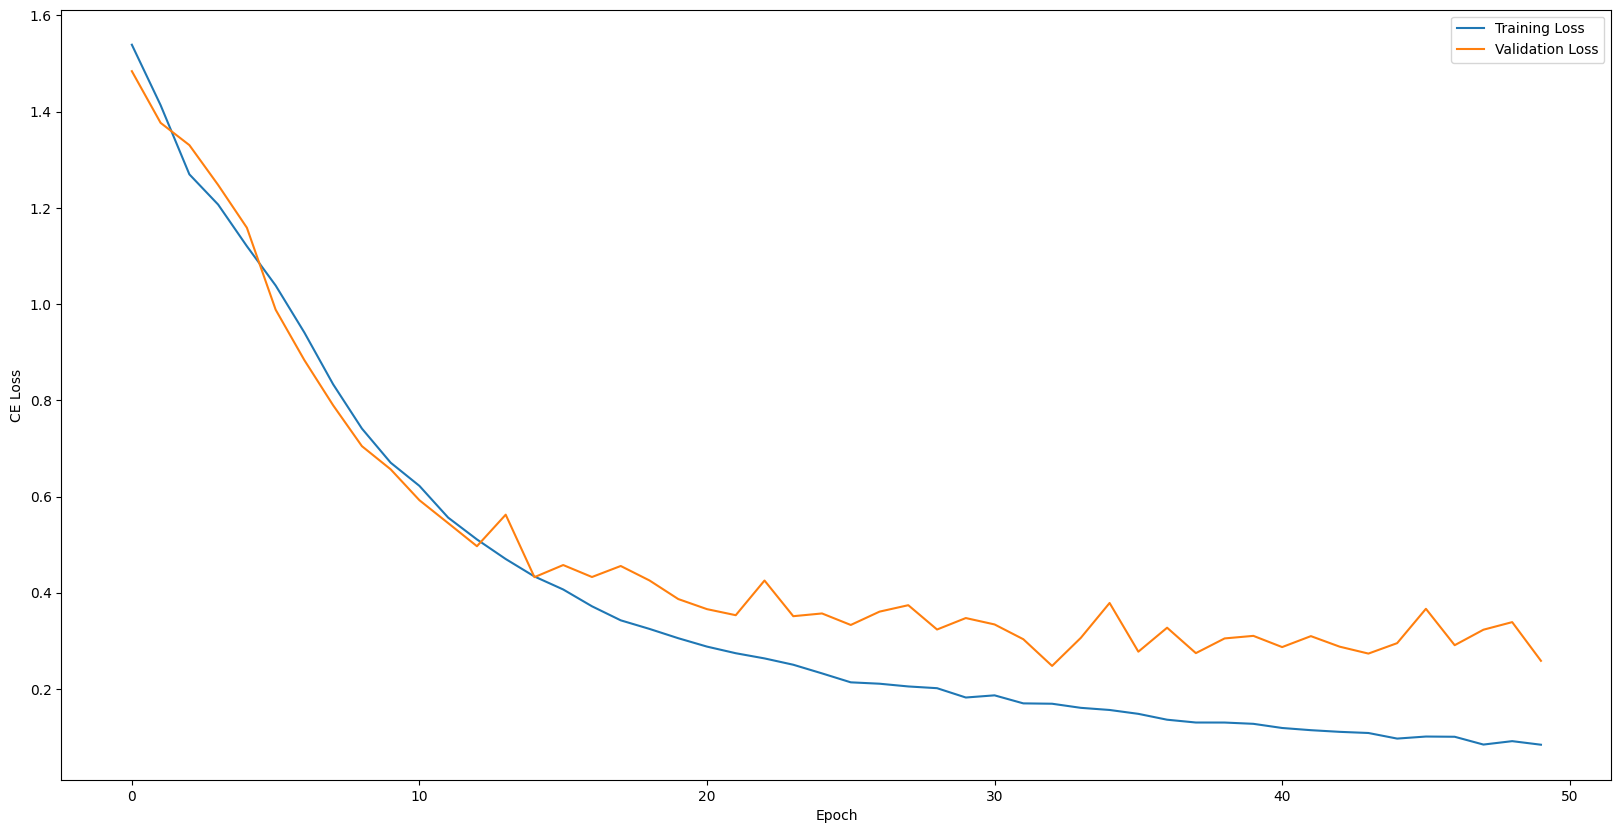

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, opt["epochs"], 1), loss_list[0], label="Training Loss")
plt.plot(np.arange(0, opt["epochs"], 1), loss_list[1], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("CE Loss")
plt.legend(loc="best")

plt.show()

### 훈련 및 검증 정확도 시각화

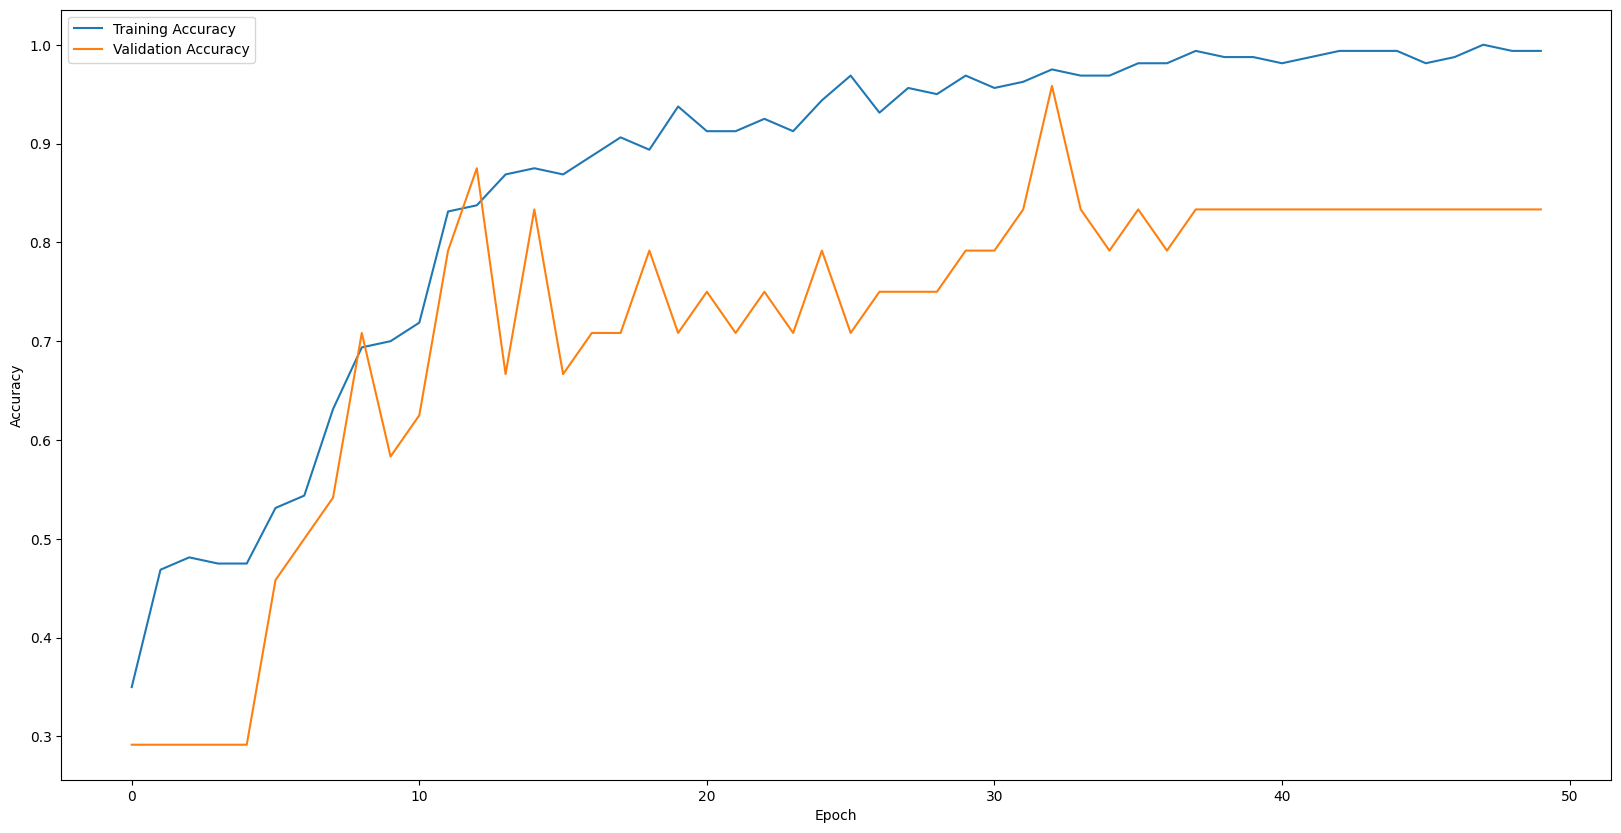

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, opt["epochs"], 1), acc_list[0], label="Training Accuracy")
plt.plot(np.arange(0, opt["epochs"], 1), acc_list[1], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

## **추상화된 딥 러닝 모델 추론 코드 작성**

In [ ]:
def inference(opt, input_data, model_path) :
  weights = torch.load(model_path)

  model = MyModel(x_train.shape[1], opt["num_class"], 64)
  model.load_state_dict(weights)
  if opt["cuda"] :
    model = model.cuda()

  input_data_tensor = torch.as_tensor(input_data).float()

  pred_list = []

  model.eval()

  with torch.no_grad() :
    with tqdm(total=input_data.shape[0]) as p_bar :
      for input_data in input_data_tensor :
        if opt["cuda"] :
          input_data = input_data.cuda()

        pred = model(input_data)
        pred_list.append(torch.argmax(pred, dim=0).detach().cpu().item())

        p_bar.update()

  return pred_list

### 시험 데이터셋 추론 진행

In [ ]:
pred_list = inference(opt, x_test, "/content/best_model.pth")

100%|██████████| 20/20 [00:00<00:00, 406.15it/s]


In [ ]:
pred_list

[4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0]

In [ ]:
y_test

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0])

### **시험 데이터셋 추론 결과의 정량적 분석 진행**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
acc_score = accuracy_score(y_test, pred_list)
print(acc_score)

1.0


In [ ]:
cm = confusion_matrix(y_test, pred_list)
print(cm)

[[7 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]


In [ ]:
cls_report = classification_report(y_test, pred_list)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

